<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---



[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

Copyright (c) 2022, Prithwis Mukerjee All rights reserved.

This source code is licensed under the GNU GPL v3.0 -style license found in the LICENSE file in the root directory of this source tree.

#SetUp

##Installs

In [1]:
!pip -qq install python-docx                #https://python-docx.readthedocs.io/en/latest/
!apt install mongodb > /dev/null

#!pip -qq install pyswisseph                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
#!pip -qq install python_string_utils


     |████████████████████████████████| 5.6 MB 5.1 MB/s 




In [2]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
import json
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import datetime
from datetime import timedelta
import pytz

#import matplotlib.pyplot as plt
#import math


In [3]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
!wget -O p21utilsR.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utilsR.py 
# ---------------------------

!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                  # all global variables

In [182]:
#!cat p21utils.py
import p21
import p21utils
import p21utilsR
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)
importlib.reload(p21utilsR)

imported p21
p21utils imported
p21utilsR imported


<module 'p21utilsR' from '/content/p21utilsR.py'>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))


Mounted at /content/drive
btncgfi3a5bxyea
39662


In [12]:
kollection = db.khona21Test                   # Set the collection to work with
totalCharts = kollection.count_documents({})
print(totalCharts)

5


#Generate Report
for all retrieved charts

In [185]:
def genSampleReport(Sample = True):
    if Sample:
        df4Report = df.sample(5)
    else:
        df4Report = df
    
    selectedCharts = len(df)
    printCharts = len(df4Report)
    #printStatus = str(printCharts)+' charts of total '+str(totalCharts)+' printed.'
    printStatus = str(selectedCharts)+' Charts selected from '+str(totalCharts)+'. Random '+str(printCharts)+' charts printed.'

    now = datetime.now(pytz.timezone('Asia/Kolkata'))
    fileName = 'Khona21_'+now.strftime("%H%M")+'.doc'
    curQueryStr = json.dumps(selCond)
    # ---------------------------------------------------------
    p21utilsR.R01_CreateReportDoc(curQueryStr, printStatus)                      # Creates MS Word Doc called p21.document
    # ----------------------------------------------------------
    for chart in range(len(df4Report)):
        chartData =df4Report.iloc[chart]
        #R51_processChart(chartData)
        p21utilsR.R511_parseChartData(chartData)              # Break up database data into useful pieces
                                            # Creates two primary dicts, GLon, GRet
        for ctype in ['Rashi','Navamsa']:
        #for ctype in ['Rashi']:
            p21.ChartType = ctype
            p21utils.R11_LocateGrahaInRashi()   # Converts Graha Long to Rashi positions
                                                # Rashi Num as well as Rashi name
            #p21utilsR.R12B_drawChart_Bengal()    # Draw Chart in Bengal style
            #p21utilsR.R12B_drawChart_South()    # Draw Chart in South India style
            p21utilsR.R12B_drawChart_North()    # Draw Chart in North India style
                                                
        #print(p21.GrahaBhava)
        #print(p21.LordBhav)
        p21utilsR.R512_FormatPage()
        print('----')
    # ------------------------------------
    p21.document.save(fileName)
    


#Retrieve Charts 

In [8]:
c = kollection.find().limit(5)
for crnt in c:
    print(crnt)

{'_id': ObjectId('61e7d1dd1db8a8ed9a2d2535'), 'pid': {'tags': ['Entertain/Music', 'Entertain/Music', 'Entertain/Music'], 'ck': 'M196810617:351.048.553.3', 'chartType': 'Rashi', 'name': 'o_ADmiqeinu'}, 'GLon': {'La': 330.585, 'Su': 170.058, 'Mo': 352.365, 'Ma': 135.907, 'Me': 187.196, 'Ju': 148.891, 'Ve': 198.822, 'Sa': 359.352, 'Ra': 346.222, 'Ke': 166.222}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': True, 'Ra': False, 'Ke': False}, 'BhavN': [' ', 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'BhavA': [' ', 'Pis', 'Ari', 'Tau', 'Gem', 'Can', 'Leo', 'Vir', 'Lib', 'Sco', 'Sag', 'Cap', 'Acq'], 'Lord': [' ', 'Ju', 'Ma', 'Ve', 'Me', 'Mo', 'Su', 'Me', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa'], 'LordRashiN': [' ', 5, 5, 7, 7, 12, 6, 7, 7, 5, 5, 12, 12], 'LordRashiA': [' ', 'Leo', 'Leo', 'Lib', 'Lib', 'Pis', 'Vir', 'Lib', 'Lib', 'Leo', 'Leo', 'Pis', 'Pis'], 'GrahaLordBhav': {'Su': [6], 'Mo': [5], 'Ma': [2, 9], 'Me': [4, 7], 'Ju': [1, 10], 'Ve': [3, 8

----
----
----
----
----


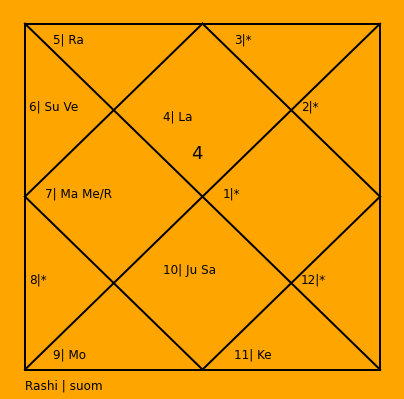

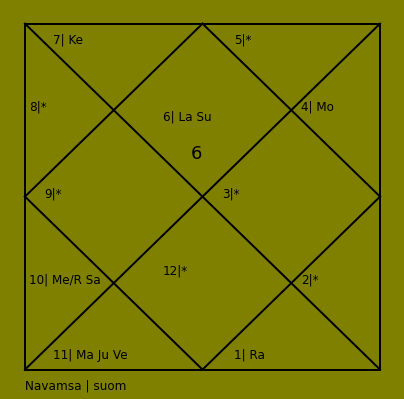

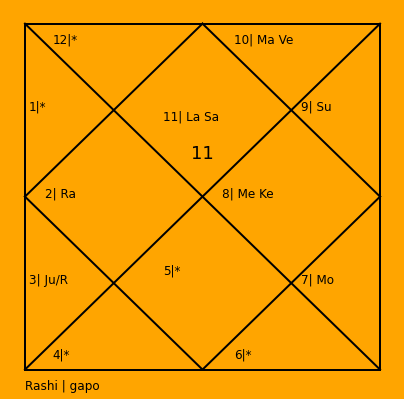

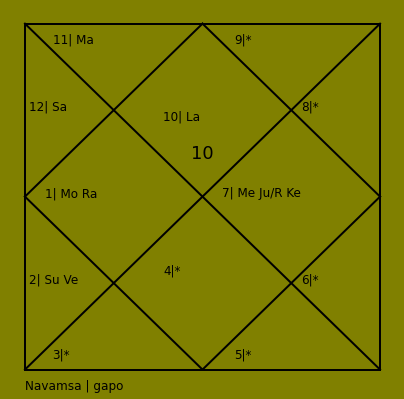

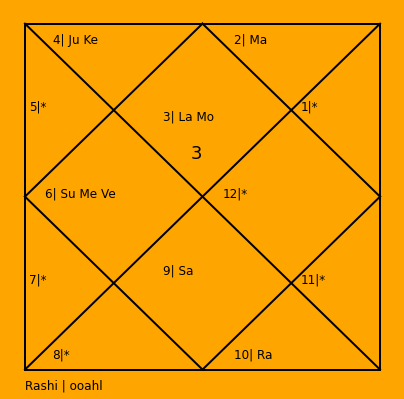

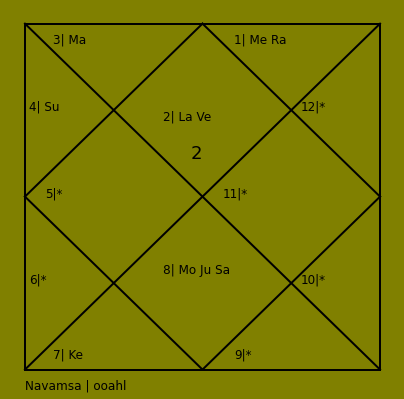

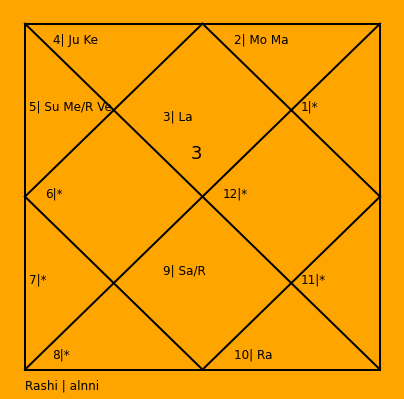

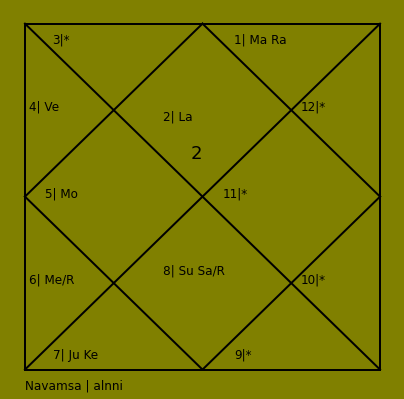

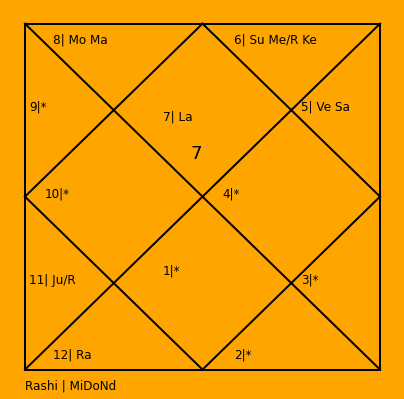

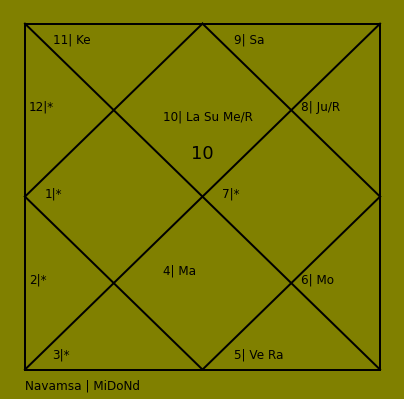

In [186]:
selCond = {}                      # All Charts 
df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport(Sample = False)

In [184]:
!rm *.doc

In [ ]:
%%capture

selCond = {'GAspectedBy2.La': {'$in': ['Sa']}}                      # La aspected by Sa
df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [ ]:
%%capture
selCond = {"$and":
                    [
                        {'exaltG.Ju': {'$eq': True}},               # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}}       # La aspected by Sa          

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [ ]:
%%capture
selCond = {"$and":
                    [
                        {'exaltG.Ju': {'$eq': True}},               # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,     # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}}       # Su conjunct Me 

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [ ]:
%%capture
selCond = {"$and":
                    [
                        {'exaltG.Ju': {'$eq': True}},               # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,     # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}},      # Su conjunct Me 
                        {'GrahaBhava.Mo' : {'$eq': 1}}              # Mo in First House

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [11]:
%%capture
selCond = {"$and":
                    [
                        {'exaltG.Ju': {'$eq': True}},               # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,     # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}},      # Su conjunct Me 
                        {'GrahaBhava.Mo' : {'$eq': 1}} ,            # Mo in First House
                        {'LordBhav.4' : {'$eq': 5}}                 # 4th Lord in 5th House

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport(Sample = False)

In [ ]:
#df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
#df